<a href="https://colab.research.google.com/github/asilahnq12/student-performance-porto/blob/main/Student_Perfomance_Portofolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA

kaggle : https://www.kaggle.com/datasets/haseebindata/student-performance-predictions/data

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [60]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=15WMcH2YKXZRzfpjj-x5XrIzbBwcl3YKI", sep = ',')
df

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [38]:
#check missing data
df.isna().sum()

,0
StudentID,0
Name,0
Gender,0
AttendanceRate,0
StudyHoursPerWeek,0
PreviousGrade,0
ExtracurricularActivities,0
ParentalSupport,0
FinalGrade,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 848.0+ bytes


In [40]:
df.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000


## EDA

In [41]:
# distribution of gender

df['Gender'].value_counts(normalize=True).reset_index()

,Gender,proportion
0,Male,0.5
1,Female,0.5


In [42]:
# averages by gender
gender_grp = df.groupby('Gender')

gender_grp[['AttendanceRate', 'StudyHoursPerWeek','PreviousGrade', 'ExtracurricularActivities', 'FinalGrade']].mean()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
Gender,,,,,
Female,89.8,21.4,83.6,1.8,85.6
Male,81.4,14.0,72.6,1.2,74.8


In [43]:
unpivot = gender_grp['ParentalSupport'].value_counts(normalize=True).reset_index()
unpivot

,Gender,ParentalSupport,proportion
0,Female,Medium,0.6
1,Female,High,0.4
2,Male,Low,0.6
3,Male,High,0.4


In [91]:
# parental support by gender
pivot = unpivot.pivot_table(index='ParentalSupport', columns='Gender', values='proportion', fill_value=0)
pivot

Gender,Female,Male
ParentalSupport,,
High,0.4,0.4
Low,0.0,0.6
Medium,0.6,0.0


## Heatmap (Correlation)

In [61]:
data=df.copy()
Gender_label_Encoding={
    "Male":0,
    "Female":1
}
data['Gender']=data['Gender'].map(Gender_label_Encoding)

ParentalSupport_label_Encoding={
    "Low":0,
    "Medium":1,
    "High":2
}
data['ParentalSupport']=data['ParentalSupport'].map(ParentalSupport_label_Encoding)

data=data.drop(['StudentID',"Name"],axis=1)
data

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,0,85,15,78,1,2,80
1,1,90,20,85,2,1,87
2,0,78,10,65,0,0,68
3,0,92,25,90,3,2,92
4,1,88,18,82,2,1,85
5,1,95,30,88,1,2,90
6,0,70,8,60,0,0,62
7,1,85,17,77,1,1,78
8,0,82,12,70,2,0,72
9,1,91,22,86,3,2,88


<Axes: >

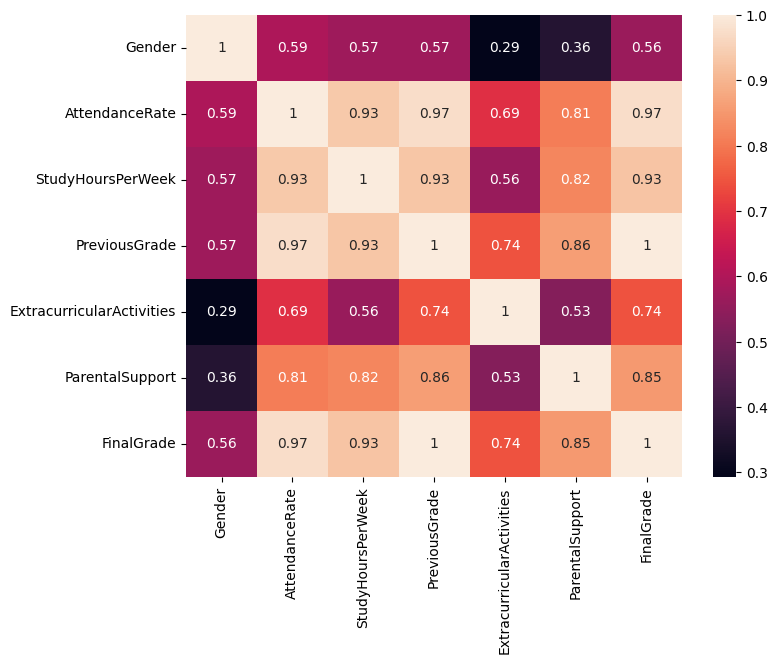

In [63]:
sns.heatmap(data.corr(), annot=True)

Strong Positive Correlations:
* Attendance Rate: Students with higher attendance tend to have better final grades.
* Study Hours Per Week: Increased study hours correlate with higher grades.
* Previous Grade: Past performance is a strong predictor of future grades.
* Parental Support: Parental involvement positively impacts student achievement.

Weaker Correlation:
* Extracurricular Activities: While participation in extracurricular activities has a positive correlation, it appears to be less influential compared to academic factors.

## Analysis

How does parental support affect and studying hours per day ?

In [68]:
df['StudyHoursPerWeek'].mean()

17.7

In [69]:
data_lower_than_mean = df[df['StudyHoursPerWeek'] < 17.7]
data_lower_than_mean[["ParentalSupport", "StudyHoursPerWeek"]]

,ParentalSupport,StudyHoursPerWeek
0,High,15
2,Low,10
6,Low,8
7,Medium,17
8,Low,12


We can observe that most students who study fewer hours per week than the average have parental support ranging from low to medium.

In [70]:
data_higher_than_mean = df[df['StudyHoursPerWeek'] > 17.7]
data_higher_than_mean[["ParentalSupport", "StudyHoursPerWeek"]]

,ParentalSupport,StudyHoursPerWeek
1,Medium,20
3,High,25
4,Medium,18
5,High,30
9,High,22


In [71]:
studying_hour_high_support = df['StudyHoursPerWeek'][df['ParentalSupport'] == 'High'].mean()
studying_hour_medium_support = df['StudyHoursPerWeek'][df['ParentalSupport'] == 'Medium'].mean()
studying_hour_low_support = df['StudyHoursPerWeek'][df['ParentalSupport'] == 'Low'].mean()

x1 = ['High', 'Medium', 'Low']
y1 = [studying_hour_high_support, studying_hour_medium_support, studying_hour_low_support]

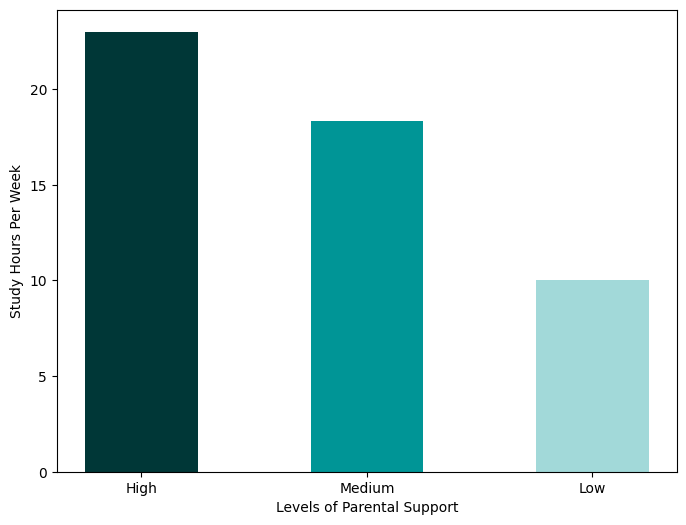

In [72]:
plt.bar(x1, y1, color=["#003737", "#009596", "#A2D9D9"], width=0.5)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Levels of Parental Support')
plt.ylabel('Study Hours Per Week')
plt.show()

We can observe that most students who study more hours per week than the average have parental support ranging from medium to high.

How does parental support affect the activiy ?

In [73]:
df[["ParentalSupport", "ExtracurricularActivities"]]

,ParentalSupport,ExtracurricularActivities
0,High,1
1,Medium,2
2,Low,0
3,High,3
4,Medium,2
5,High,1
6,Low,0
7,Medium,1
8,Low,2
9,High,3


In [74]:
df[['ParentalSupport','ExtracurricularActivities']][df['ParentalSupport']=='High']

,ParentalSupport,ExtracurricularActivities
0,High,1
3,High,3
5,High,1
9,High,3


We can observe that the students who parental support is high, participate in at least one extra activity .

In [75]:
df[['ParentalSupport','ExtracurricularActivities']][df['ParentalSupport']=='Medium']

,ParentalSupport,ExtracurricularActivities
1,Medium,2
4,Medium,2
7,Medium,1


We can observe that the students who parental support is medium, participate in at least one extra activity, too.

In [76]:
data[['ParentalSupport','ExtracurricularActivities']][df['ParentalSupport']=='Low']

,ParentalSupport,ExtracurricularActivities
2,0,0
6,0,0
8,0,2


We can observe that the most students with low parental support, doesn't participate in any extra activity .

In [77]:
activities_high_support = df['ExtracurricularActivities'][df['ParentalSupport'] == 'High'].mean()
activities_medium_support = df['ExtracurricularActivities'][df['ParentalSupport'] == 'Medium'].mean()
activities_low_support = df['ExtracurricularActivities'][df['ParentalSupport'] == 'Low'].mean()

x2 = ['High', 'Medium', 'Low']
y2 = [activities_high_support, activities_medium_support, activities_low_support]

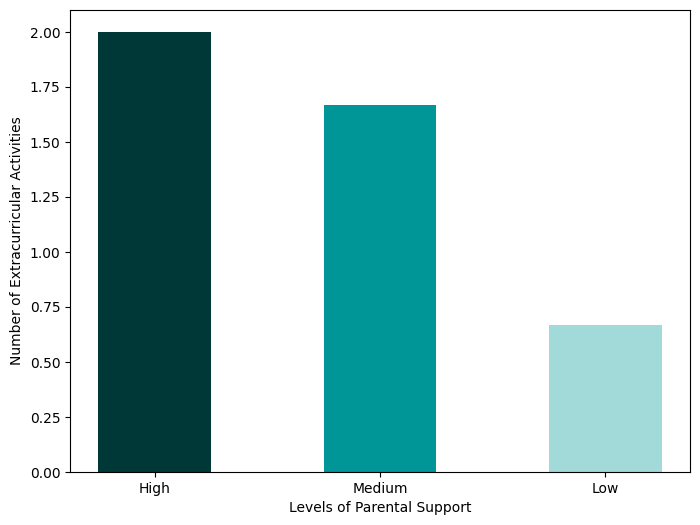

In [78]:
plt.bar(x2, y2, color=["#003737", "#009596", "#A2D9D9"], width=0.5)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Levels of Parental Support')
plt.ylabel('Number of Extracurricular Activities')
plt.show()

Study Hours:
* The average student in the dataset studies for approximately 17.7 hours per week.
* Students who study fewer hours than the average tend to have low to medium parental support.
* Students who study more hours than the average tend to have medium to high parental support.

Extracurricular Activities:
* There seems to be a positive correlation between parental support and participation in extracurricular activities.
* Students with high and medium parental support are more likely to participate in at least one extracurricular activity.
* Students with low parental support are less likely to participate in extracurricular activities.

## Preprocessing, Model Training, and Evaluation

In [79]:
# Encoding Categorical Data
df1=df.copy()
label_encoder = LabelEncoder()
Gender_label_Encoding={
    "Male":1,
    "Female":0
}
df1['Gender']=df1['Gender'].map(Gender_label_Encoding)
df1.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,1,85,15,78,1,High,80
1,2,Sarah,0,90,20,85,2,Medium,87
2,3,Alex,1,78,10,65,0,Low,68
3,4,Michael,1,92,25,90,3,High,92
4,5,Emma,0,88,18,82,2,Medium,85


In [80]:
# One-Hot Encoding for 'Parental Support'
df1 = pd.get_dummies(df1, columns=['ParentalSupport'], drop_first=False)
df1.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium
0,1,John,1,85,15,78,1,80,True,False,False
1,2,Sarah,0,90,20,85,2,87,False,False,True
2,3,Alex,1,78,10,65,0,68,False,True,False
3,4,Michael,1,92,25,90,3,92,True,False,False
4,5,Emma,0,88,18,82,2,85,False,False,True


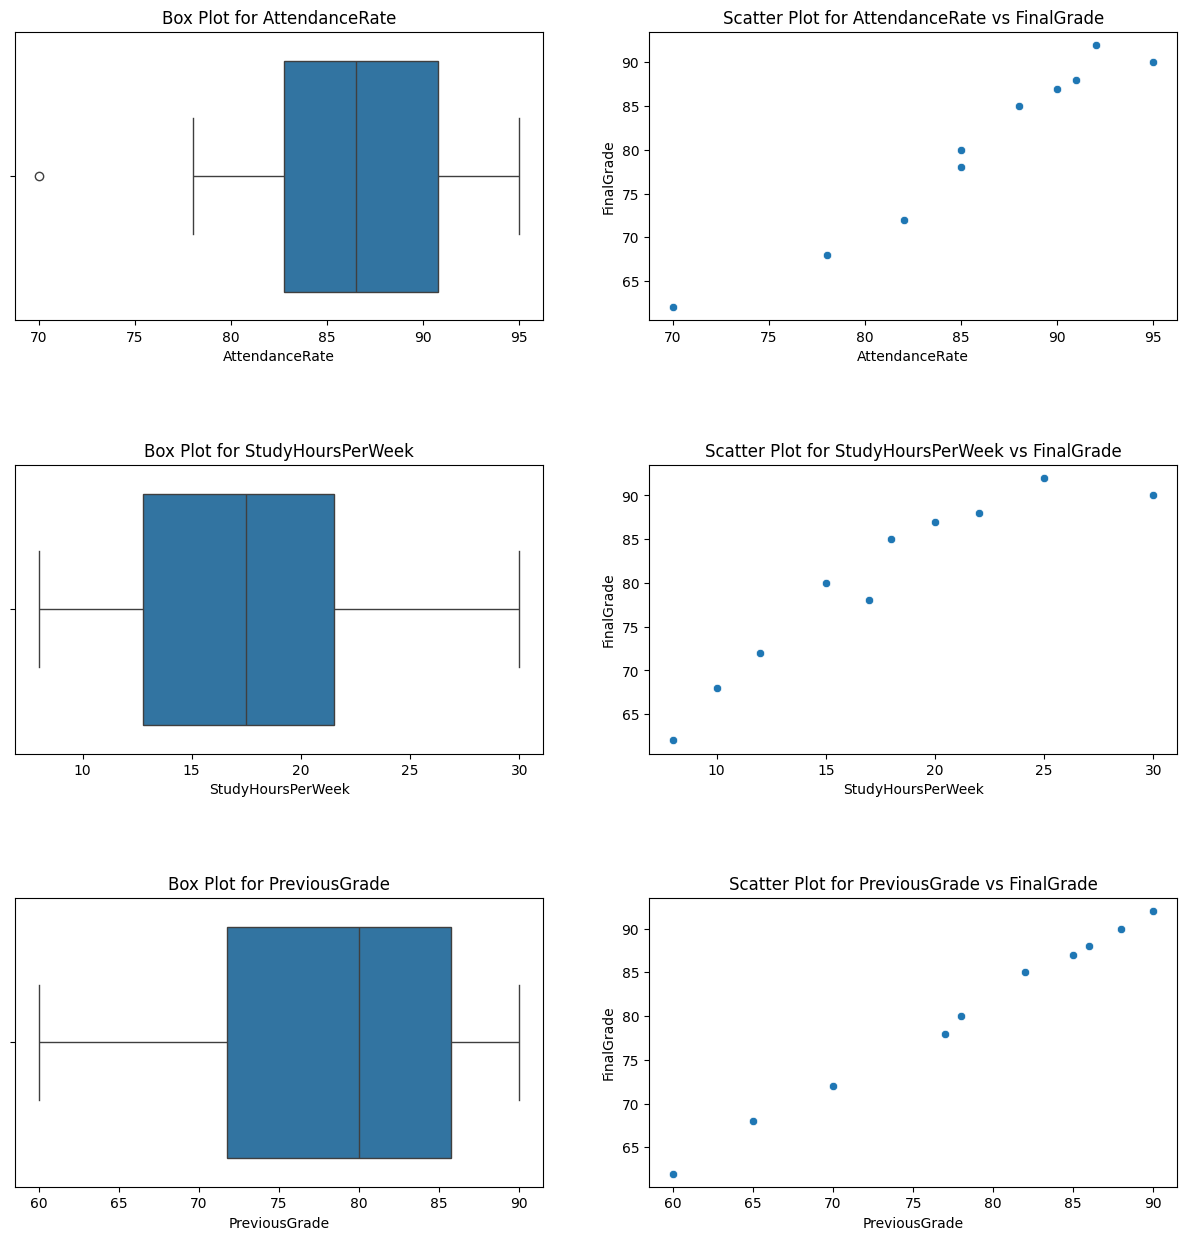

In [81]:
#Visualizing Data Distributions and Relationships
columns = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'FinalGrade']
fig, ax = plt.subplots(len(columns) - 1, 2, figsize=(15, (len(columns) - 1) * 5))
plt.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns[:-1]):  # Exclude 'FinalGrade' from scatter plots
    # Boxplot
    sns.boxplot(x=df1[column], ax=ax[i, 0])
    ax[i, 0].set_title(f'Box Plot for {column}')

    # Scatter plot for each feature vs FinalGrade
    sns.scatterplot(x=df1[column], y=df1['FinalGrade'], ax=ax[i, 1])
    ax[i, 1].set_title(f'Scatter Plot for {column} vs FinalGrade')

plt.show()

* Attendance, study hours, and previous grades are positively correlated with the final grade.
* Students with higher attendance, more study hours, and better previous grades tend to have higher final grades.



In [82]:
# Scaling Features Using Min-Max Normalization

scaler = MinMaxScaler()
df1[['AttendanceRate','StudyHoursPerWeek','PreviousGrade','FinalGrade']] = scaler.fit_transform(df1[['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'FinalGrade']])
df1.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium
0,1,John,1,0.60,0.318182,0.600000,1,0.600000,True,False,False
1,2,Sarah,0,0.80,0.545455,0.833333,2,0.833333,False,False,True
2,3,Alex,1,0.32,0.090909,0.166667,0,0.200000,False,True,False
3,4,Michael,1,0.88,0.772727,1.000000,3,1.000000,True,False,False
4,5,Emma,0,0.72,0.454545,0.733333,2,0.766667,False,False,True


In [83]:
# Converting Categorical Variables to Integer

df1[['ParentalSupport_High', 'ParentalSupport_Low', 'ParentalSupport_Medium']] = df1[['ParentalSupport_High', 'ParentalSupport_Low', 'ParentalSupport_Medium']].astype(int)
df1.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium
0,1,John,1,0.60,0.318182,0.600000,1,0.600000,1,0,0
1,2,Sarah,0,0.80,0.545455,0.833333,2,0.833333,0,0,1
2,3,Alex,1,0.32,0.090909,0.166667,0,0.200000,0,1,0
3,4,Michael,1,0.88,0.772727,1.000000,3,1.000000,1,0,0
4,5,Emma,0,0.72,0.454545,0.733333,2,0.766667,0,0,1


In [84]:
# Splitting the Dataset into Training and Testing Sets¶

X = df1.drop(['StudentID','Name','FinalGrade'],axis=1)
y = df1['FinalGrade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Training and Evaluating the Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [86]:
mse

0.005142285447043331

In [87]:
r2

0.9177234328473067

In [88]:
# Training and Evaluating the Random Forest Regressor

random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

In [89]:
mse_random_forest

0.003539222222222257

In [90]:
r2_random_forest

0.9433724444444439

Both the linear regression and random forest models have performed **well** in predicting the target variable. However, t**he random forest model has slightly outperformed the linear regression model** based on the lower mean squared error (MSE) and higher R-squared (R2) value.

* Mean Squared Error (MSE) : A lower MSE indicates that the model's predictions
are closer to the actual values.
* R-squared (R2) : A higher R2 value indicates that the model explains a larger proportion of the variance in the target variable.